In [28]:
import networkx as nx
import matplotlib.pyplot as plt

from src.algorithms.models.graph_manager import GraphManager
from src.algorithms.simulated_annealing import SimulatedAnnealing
from src.algorithms.tabu_search import TabuSearch

from src.utils.graph import generate_nx_graph


In [29]:
clm = GraphManager(
    node_list='./data/orders_with_depots.csv',
    max_cap=1000,
    vehicles=5
)

SA = SimulatedAnnealing(graph_manager=clm, epochs=35, attempts=30, 
                        initial_temp=1, cooling_rate=0.9)

In [30]:
solution = SA.optimize()
print(SA)

-----------Simulated Annealing Algorithm-----------
Current Temperature  : 0.05
Initial Temperature  : 1
Cooling Factor       : 0.9
Epochs               : 35
Attempts             : 30
Fleet size           : 5
Vehicle Capacity     : 1000
Total Locations      : 31
Total Depots         : 1
Initial Shortest     : 10299.89
Current Shortest     : 4801.129999999999
---------------------------------------------------


In [31]:
# print routes
print('Total distance covered:', solution.total_length)
fleet = SA.to_fleet()
for vehicle in fleet:
    print(f'Vehicle: {vehicle.number}')
    for route in vehicle.routes:
        print(route)

Total distance covered: 4801.129999999999
Vehicle: 001
<DoublyLinkedList (weight: 740, length: 188.61) Kraków -> Katowice -> Gliwice -> Chrzanów -> Kraków >
<DoublyLinkedList (weight: 120, length: 327.02) Kraków -> Krosno -> Rzeszów -> Kraków >
Vehicle: 002
<DoublyLinkedList (weight: 960, length: 1280.83) Kraków -> Poznań -> Malbork -> Gdańsk -> Gdynia -> Olsztyn -> Kielce -> Szczucin -> Tarnów -> Kraków >
<DoublyLinkedList (weight: 90, length: 24.98) Kraków -> Wieliczka -> Kraków >
Vehicle: 003
<DoublyLinkedList (weight: 370, length: 242.88) Kraków -> Nowy Targ -> Zakopane -> Bielsko-Biała -> Kraków >
<DoublyLinkedList (weight: 760, length: 598.27) Kraków -> Zamość -> Lublin -> Puławy -> Sandomierz -> Kraków >
Vehicle: 004
<DoublyLinkedList (weight: 850, length: 876.75) Kraków -> Radom -> Krynica -> Białystok -> Warszawa -> Kraków >
Vehicle: 005
<DoublyLinkedList (weight: 600, length: 1261.79) Kraków -> Łódź -> Gromnik -> Szczecin -> Szklarska Poręba -> Wrocław -> Kraków >


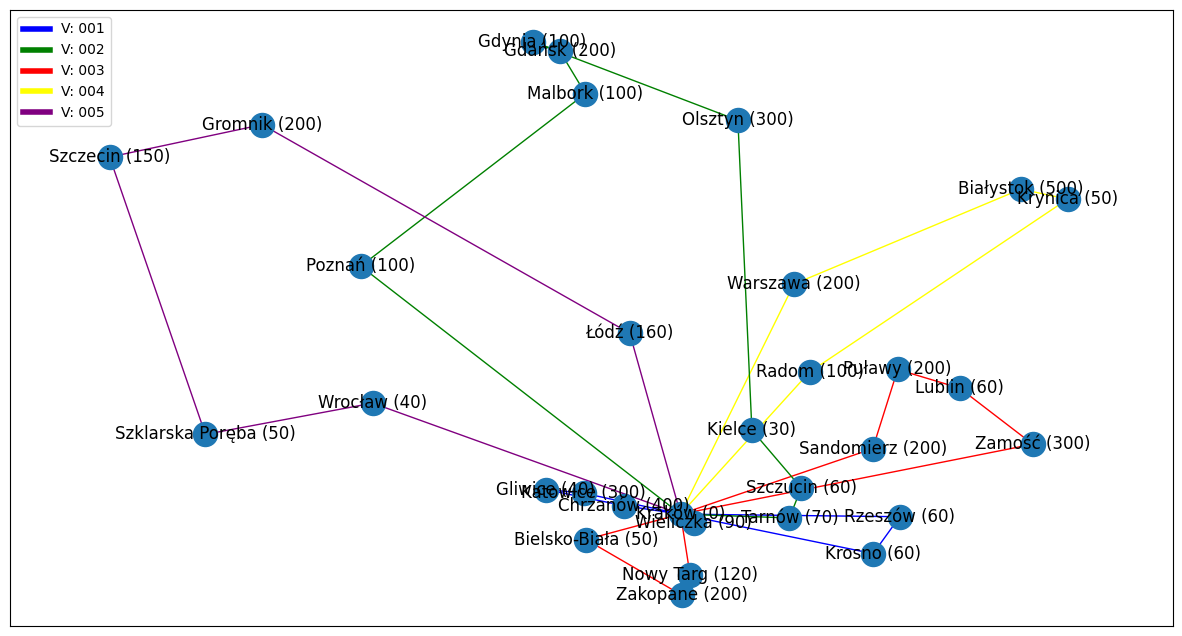

In [32]:
generate_nx_graph(fleet)

In [33]:
clm = GraphManager(
    node_list='./data/orders_with_depots.csv',
    max_cap=1000,
    vehicles=5
)

TS = TabuSearch(graph_manager=clm, max_iterations=1500, tabu_size=100)

In [37]:
solution_ts = TS.optimize()
print(TS)

---------------Tabu Search Algorithm---------------
Iterations           : 1500
Tabu List Size       : 100
Fleet size           : 5
Vehicle Capacity     : 1000
Total Locations      : 31
Total Depots         : 1
Initial Shortest     : 10299.89
Current Shortest     : 4887.749999999999
---------------------------------------------------


In [38]:
# print routes
print('Total distance covered:', solution_ts.total_length)
fleet_ts = TS.to_fleet()
for vehicle in fleet_ts:
    print(f'Vehicle: {vehicle.number}')
    for route in vehicle.routes:
        print(route)

Total distance covered: 4887.749999999999
Vehicle: 001
<DoublyLinkedList (weight: 850, length: 942.59) Kraków -> Białystok -> Krynica -> Zamość -> Kraków >
<DoublyLinkedList (weight: 200, length: 170.15) Kraków -> Zakopane -> Kraków >
Vehicle: 002
<DoublyLinkedList (weight: 940, length: 796.43) Kraków -> Nowy Targ -> Tarnów -> Kielce -> Warszawa -> Puławy -> Lublin -> Sandomierz -> Szczucin -> Kraków >
<DoublyLinkedList (weight: 90, length: 24.98) Kraków -> Wieliczka -> Kraków >
Vehicle: 003
<DoublyLinkedList (weight: 840, length: 1217.67) Kraków -> Wrocław -> Poznań -> Gdynia -> Gdańsk -> Malbork -> Olsztyn -> Kraków >
Vehicle: 004
<DoublyLinkedList (weight: 780, length: 1512.86) Kraków -> Krosno -> Rzeszów -> Radom -> Łódź -> Gromnik -> Szczecin -> Szklarska Poręba -> Kraków >
Vehicle: 005
<DoublyLinkedList (weight: 790, length: 223.07) Kraków -> Bielsko-Biała -> Gliwice -> Katowice -> Chrzanów -> Kraków >


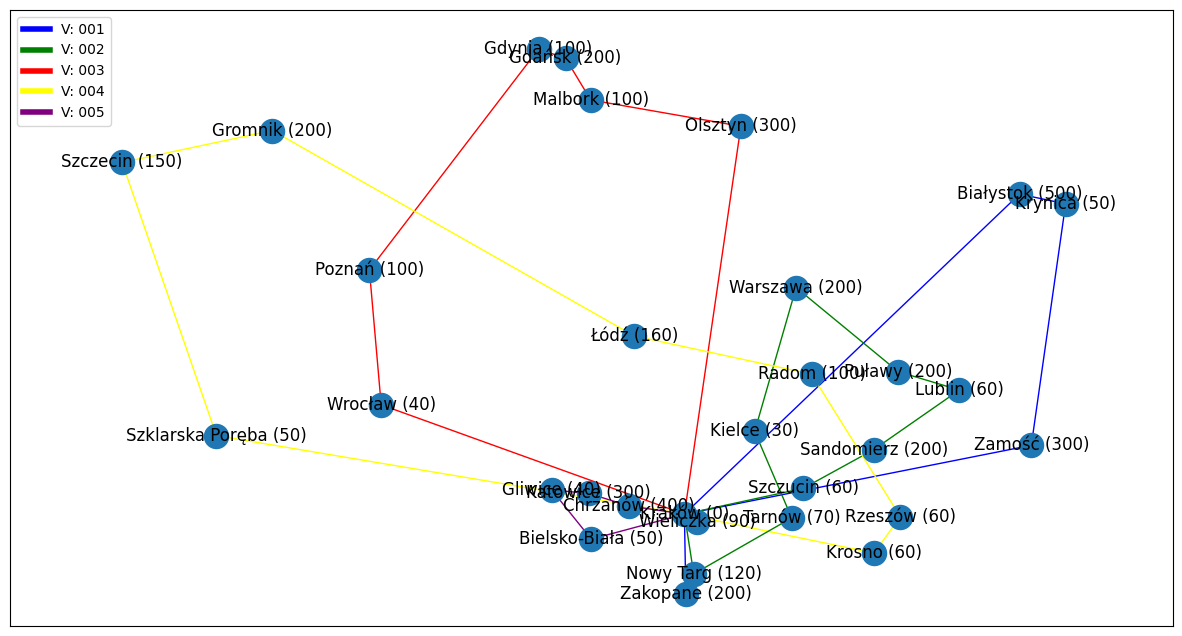

In [39]:
generate_nx_graph(fleet_ts)